In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Loading

In [32]:
df=pd.read_csv('Dataset.csv')

In [33]:
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# Data Information

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [35]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [36]:
df.shape

(110527, 14)

In [36]:
# Optional: Better plot aesthetics
sns.set(style='whitegrid', palette='pastel')
%matplotlib inline

In [37]:
df.rename(columns={'Hipertension':'Hypertension','Handcap':'Handicap','No-show':'No_show'},inplace=True)

In [38]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No_show'],
      dtype='object')

In [39]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [40]:
df['No_show'].value_counts()

No_show
No     88208
Yes    22319
Name: count, dtype: int64

In [49]:
#data conversion
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [50]:
#The date and time when the appointment was booked
#The date when the patient was supposed to come to the hospital

In [51]:
# Remove the time part by using .dt.normalize() (keeps datetime64 format, removes time)
df['ScheduledDay'] = df['ScheduledDay'].dt.normalize()
df['AppointmentDay'] = df['AppointmentDay'].dt.normalize()

In [52]:
#to calculate delay in between
df['WaitingDays'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

In [53]:
#removal of negative ages
df = df[df['Age'] >= 0]

In [54]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,WaitingDays
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


# Exploratory Data Analysis

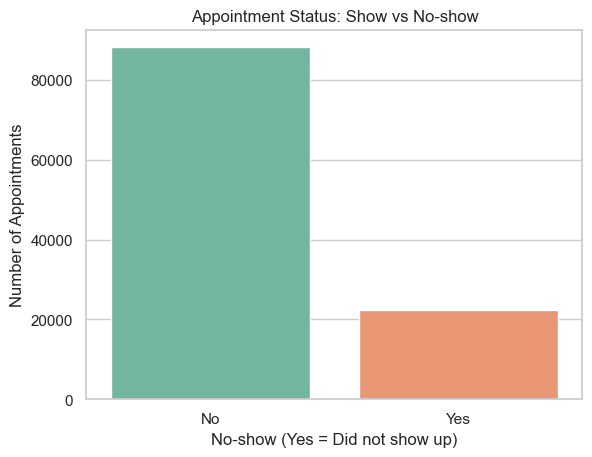

In [64]:
#Overall Show vs No-Show Distribution
sns.countplot(data=df, x='No_show', hue='No_show', palette='Set2', legend=False)
plt.title('Appointment Status: Show vs No-show')
plt.xlabel('No-show (Yes = Did not show up)')
plt.ylabel('Number of Appointments')
plt.show()

In [62]:
# Percentage breakdown
#use of normalize:Returns proportion (frequency) of each unique value (as a fraction of the total).
no_show_counts = df['No_show'].value_counts(normalize=True) * 100
print("Show/No-show distribution (%):")
print(no_show_counts)

Show/No-show distribution (%):
No_show
No     79.806561
Yes    20.193439
Name: proportion, dtype: float64


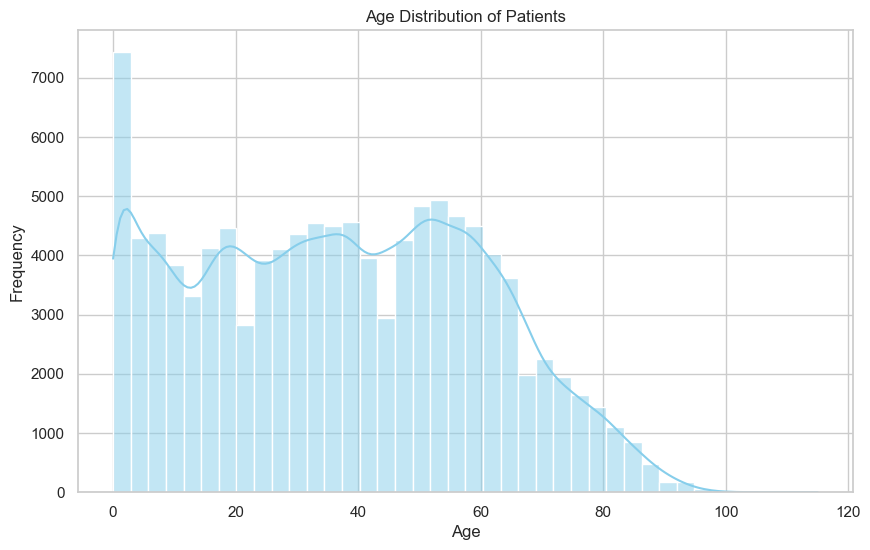

In [68]:
#Age distribution
#bins use:dividing the 'Age' data into 40 equally spaced intervals (bars).
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=40, kde=True, color='skyblue')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

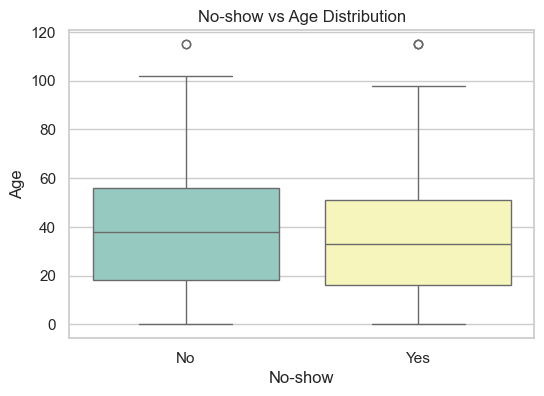

In [89]:
#Age vs No_show
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='No_show', y='Age',hue='No_show',legend=False, palette='Set3')
plt.title('No-show vs Age Distribution')
plt.xlabel('No-show')
plt.ylabel('Age')
plt.show()


 # 1. Which age group is more likely to miss appointments?
# The median age of no-shows is slightly lower than those who showed up.
# The age distribution for both groups is similar, but younger patients (20s–30s) dominate the no-show group slightly more.
 # Insight: Younger adults are more likely to miss appointments, possibly due to less perceived urgency, work/study conflicts, or forgetfulness.

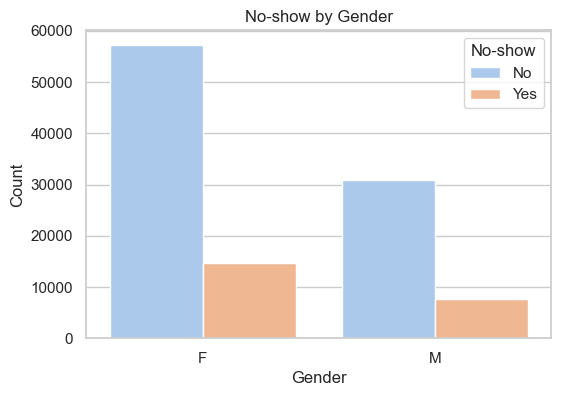

In [75]:
#gender vs no_show
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Gender', hue='No_show', palette='pastel')
plt.title('No-show by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='No-show')
plt.show()


#  Any difference between men and women?
# Women have higher total counts (both show and no-show) — likely due to population bias or more frequent appointments.
# However, no-show rate is proportionally similar between males and females.
# Insight: Gender does not significantly affect no-show behavior. The difference in counts likely reflects demographics rather than behavior.

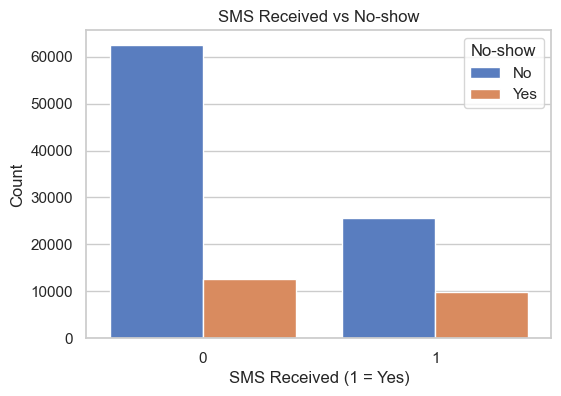

In [76]:
#sms remainder vs no_show
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='SMS_received', hue='No_show', palette='muted')
plt.title('SMS Received vs No-show')
plt.xlabel('SMS Received (1 = Yes)')
plt.ylabel('Count')
plt.legend(title='No-show')
plt.show()


# 2. Do SMS reminders help?
# Patients who didn’t receive an SMS (SMS=0) had a higher count of no-shows.
# Among those who did receive a reminder, the no-show rate is noticeably lower.
# Insight: SMS reminders appear to be effective in reducing no-shows. This suggests improving or personalizing reminders could further help.

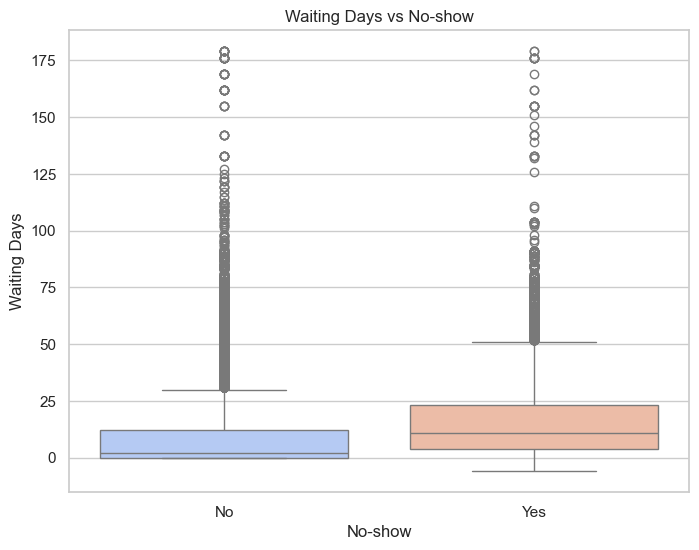

In [88]:
#waiting days vs no_show
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='No_show', y='WaitingDays',hue='No_show',legend=False, palette='coolwarm')
plt.title('Waiting Days vs No-show')
plt.xlabel('No-show')
plt.ylabel('Waiting Days')
plt.show()

# Those small circles are outliers — 
# patients who waited an unusually long time for their appointments. Some waited over 100 days, which is way above the typical range.


#  Are patients with longer waiting periods more likely to skip?
# Median waiting days is clearly higher for those who missed appointments.
# Longer waiting times are associated with more drop-offs, especially beyond ~20 days.
# Outliers show some patients waited over 150 days.
# Insight: Longer wait times increase the likelihood of missed appointments. Reducing wait time could significantly improve attendance.

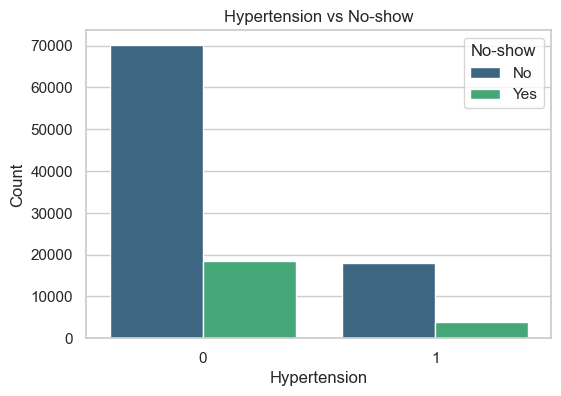

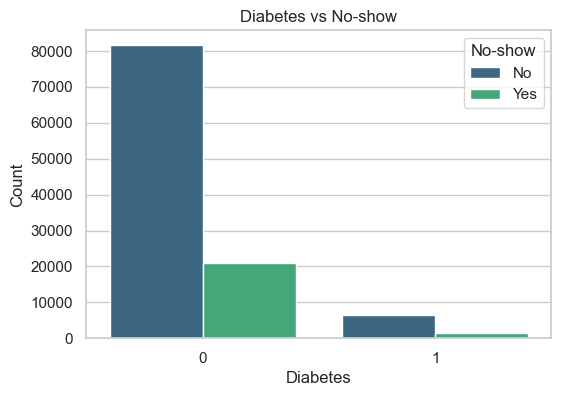

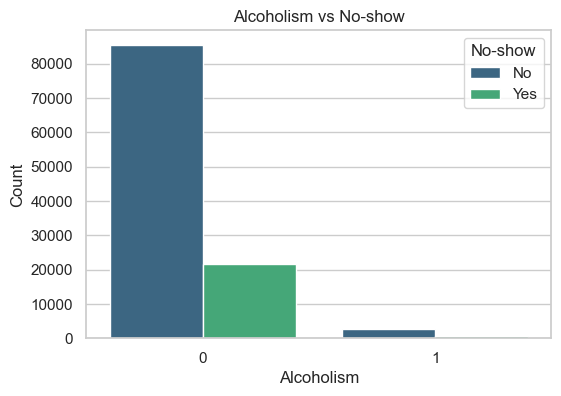

In [85]:
#medical conditions vs no_show
# Conditions: Hypertension, Diabetes, Alcoholism
conditions = ['Hypertension', 'Diabetes', 'Alcoholism']

for condition in conditions:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=condition, hue='No_show', palette='viridis')
    plt.title(f'{condition} vs No-show')
    plt.xlabel(condition)
    plt.ylabel('Count')
    plt.legend(title='No-show')
    plt.show()


# Do medical conditions affect attendance?
# Patients without hypertension are more likely to miss appointments.
# Those with hypertension had a higher attendance rate, possibly due to increased health concern or regular monitoring needs.
#  Insight: Patients with chronic conditions (like hypertension) are more committed to appointments, suggesting a perceived urgency in care continuity.


# multivariate analysis

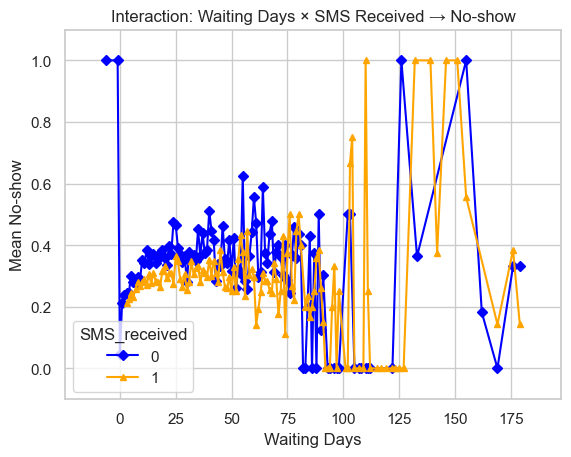

In [108]:
#waiting days, sms and no_show
# !pip install statsmodels
import statsmodels
from statsmodels.graphics.factorplots import interaction_plot

interaction_plot(df['WaitingDays'], df['SMS_received'], df['NoShowBinary'],
                 colors=['blue', 'orange'], markers=['D','^'], ms=5)
plt.title("Interaction: Waiting Days × SMS Received → No-show")
plt.xlabel("Waiting Days")
plt.ylabel("Mean No-show")
plt.grid(True)
plt.show()

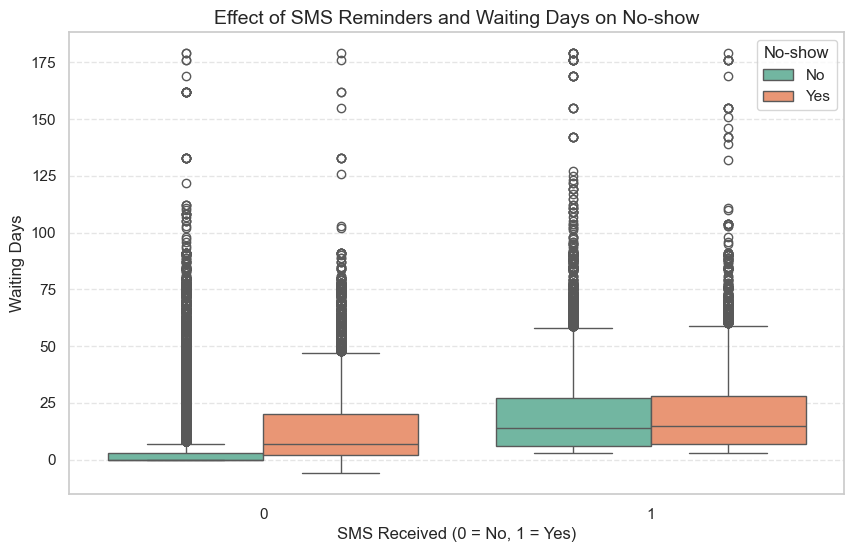

In [109]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='SMS_received', y='WaitingDays', hue='No_show', data=df, palette='Set2')
plt.title("Effect of SMS Reminders and Waiting Days on No-show", fontsize=14)
plt.xlabel("SMS Received (0 = No, 1 = Yes)")
plt.ylabel("Waiting Days")
plt.legend(title="No-show")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

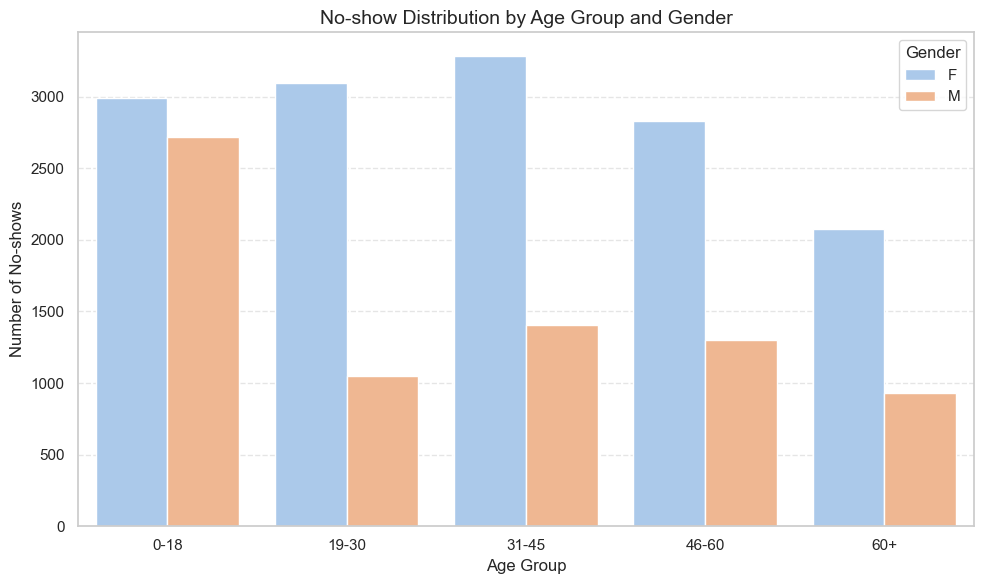

In [110]:
#age group, gender and no_show
# Create AgeGroup if not already done
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 18, 30, 45, 60, 100], labels=['0-18', '19-30', '31-45', '46-60', '60+'])

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(x='AgeGroup', hue='Gender', data=df[df['No_show'] == 'Yes'], palette='pastel')
plt.title("No-show Distribution by Age Group and Gender", fontsize=14)
plt.xlabel("Age Group")
plt.ylabel("Number of No-shows")
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


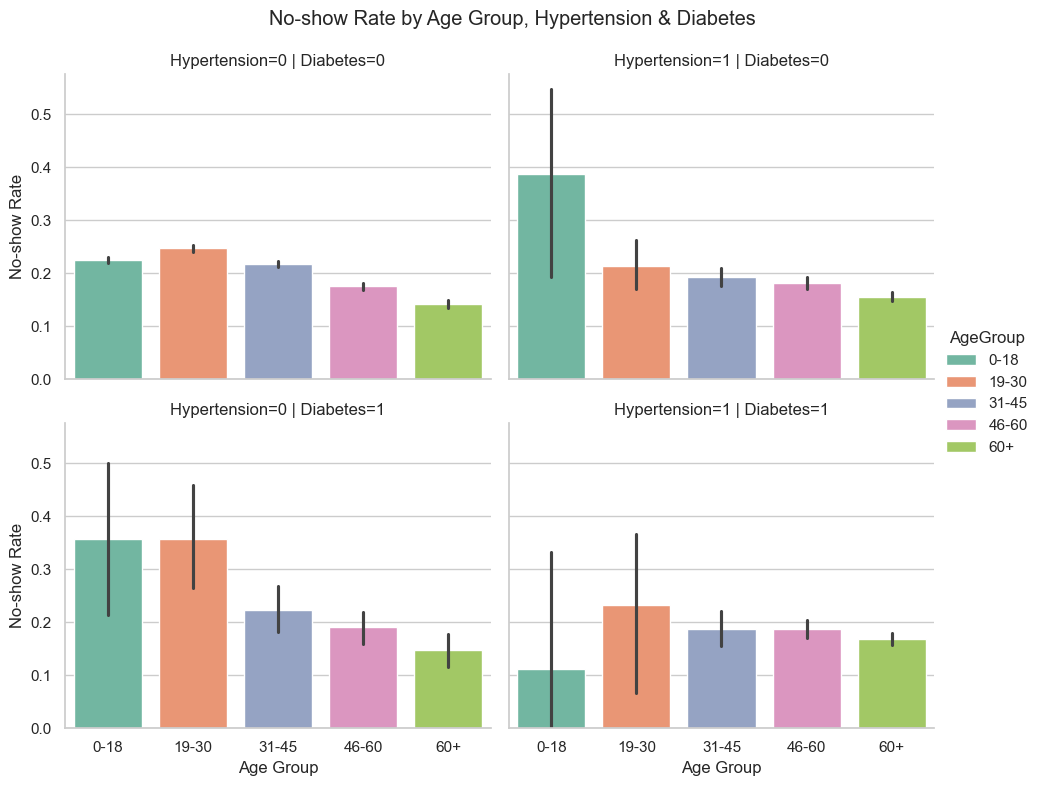

In [102]:
#age group,hypertension,diabetes, and noshow
# Create Age Groups again if not already created
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 18, 30, 45, 60, 100], labels=['0-18', '19-30', '31-45', '46-60', '60+'])
df['NoShowBinary'] = df['No_show'].map({'No': 0, 'Yes': 1})

# FacetGrid
g = sns.catplot(
    x='AgeGroup', y='NoShowBinary', col='Hypertension', row='Diabetes',
    data=df, kind='bar', height=4, aspect=1.2, palette='Set2',hue='AgeGroup',legend=True
)

g.set_titles("Hypertension={col_name} | Diabetes={row_name}")
g.set_axis_labels("Age Group", "No-show Rate")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("No-show Rate by Age Group, Hypertension & Diabetes")
plt.show()


C:\Users\kansa\AppData\Local\Temp\ipykernel_13384\4018290299.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(


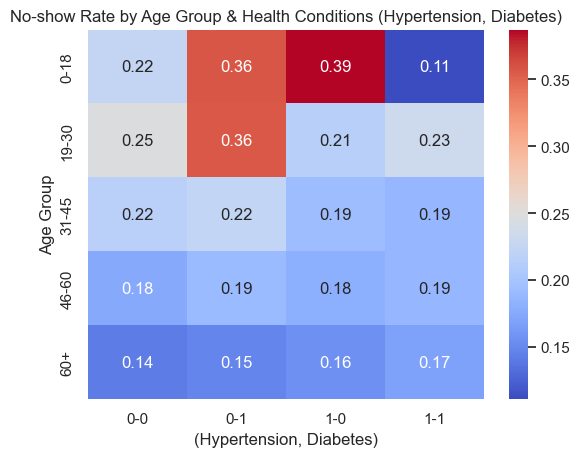

In [103]:
pivot = df.pivot_table(
    index='AgeGroup',
    columns=['Hypertension', 'Diabetes'],
    values='NoShowBinary',
    aggfunc='mean'
)

sns.heatmap(pivot, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("No-show Rate by Age Group & Health Conditions (Hypertension, Diabetes)")
plt.ylabel("Age Group")
plt.xlabel("(Hypertension, Diabetes)")
plt.show()


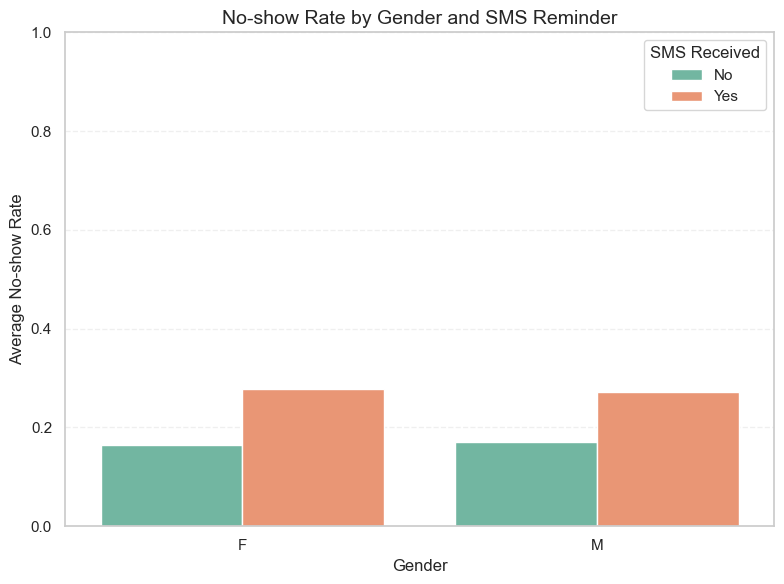

In [112]:
#sms recieved,gender and noshow
# Create binary target if not already done
df['NoShowBinary'] = df['No_show'].map({'No': 0, 'Yes': 1})

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='NoShowBinary', hue='SMS_received', data=df, palette='Set2', errorbar=None)

plt.title("No-show Rate by Gender and SMS Reminder", fontsize=14)
plt.ylabel("Average No-show Rate")
plt.xlabel("Gender")
plt.xticks(rotation=0)
plt.legend(title="SMS Received", labels=["No", "Yes"])
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
# Analysis	Insight Type
# SMS + Waiting Days	Combined effect of reminders and wait time
# Age + Gender	Differences in behavior by age and gender
# Health + Age	Who takes appointments more seriously
# SMS + Gender	If one gender benefits more from reminders
# Logistic Regression	Quantifies impact of all variables together